In [63]:
import cv2
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

In [64]:
# Membaca gambar dengan OpenCV
image_cv2 = cv2.imread('/content/drive/MyDrive/Backup bussid/quizpcd.jpg')

In [65]:
# Membaca gambar dengan PIL
image_pil = Image.open('/content/drive/MyDrive/Backup bussid/quizpcd.jpg')

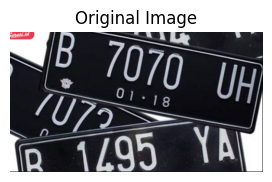

In [66]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 1)
plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.show()

In [67]:
# Fungsi untuk menghasilkan tepi gambar menggunakan filter Sobel
def sobel_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edge = np.sqrt(sobelx**2 + sobely**2)
    edge = np.uint8(edge)
    return edge

In [68]:
# Memanggil fungsi untuk deteksi tepi menggunakan Sobel
edges_sobel = sobel_edge_detection(image_cv2)

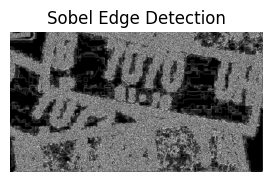

In [69]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

In [70]:
# Fungsi untuk menghasilkan tepi gambar menggunakan metode Canny
def canny_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

In [71]:
# Memanggil fungsi untuk deteksi tepi menggunakan Canny
edges_canny = canny_edge_detection(image_cv2)

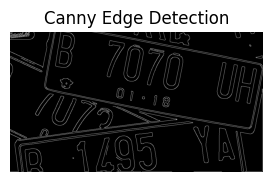

In [72]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

In [73]:
# Fungsi untuk melakukan random cropping pada gambar
def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    y = random.randint(0, height - crop_height)
    x = random.randint(0, width - crop_width)
    cropped_image = image[y:y+crop_height, x:x+crop_width]
    return cropped_image

In [74]:
# Memanggil fungsi untuk random cropping
random_cropped_image = random_crop(image_cv2, 200, 200)

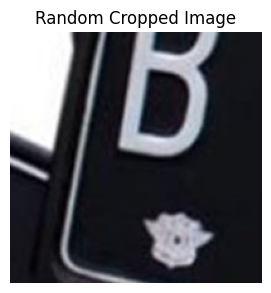

In [75]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 4)
plt.imshow(cv2.cvtColor(random_cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Random Cropped Image')
plt.axis('off')

plt.show()

In [76]:
# Fungsi untuk melakukan center cropping setengah ukuran gambar
def half_size_center_crop(image):
    height, width = image.shape[:2]
    crop_height = height // 2
    crop_width = width // 2
    y = (height - crop_height) // 2
    x = (width - crop_width) // 2
    cropped_image = image[y:y+crop_height, x:x+crop_width]
    return cropped_image

In [77]:
# Memanggil fungsi untuk half-size center cropping
half_size_center_cropped_image = half_size_center_crop(image_cv2)

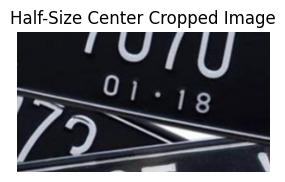

In [78]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 5)
plt.imshow(cv2.cvtColor(half_size_center_cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Half-Size Center Cropped Image')
plt.axis('off')

plt.show()

In [79]:
# Fungsi untuk mengubah gambar putih menjadi hitam dan sebaliknya
def invert_colors(image):
    return cv2.bitwise_not(image)

In [80]:
# Mengubah gambar menjadi hitam putih dan sebaliknya
inverted_image = invert_colors(image_cv2)

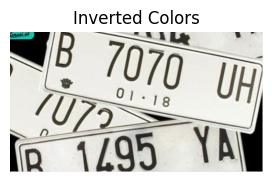

In [81]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 6)
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.title('Inverted Colors')
plt.axis('off')

plt.show()

In [82]:
# Fungsi untuk menambahkan salt and pepper noise ke gambar
def add_salt_and_pepper_noise(image, salt_vs_pepper=0.5, amount=0.01):
    out = np.copy(image)

    # Salt mode
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords[0], coords[1], :] = 255

    # Pepper mode
    num_pepper = np.ceil(amount * image.size * (1. - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords[0], coords[1], :] = 0

    return out

In [83]:
# Menambahkan salt and pepper noise
noisy_image_salt_pepper = add_salt_and_pepper_noise(image_cv2)

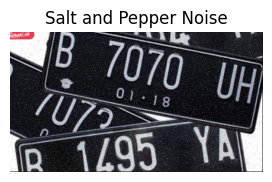

In [84]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 7)
plt.imshow(cv2.cvtColor(noisy_image_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()

In [85]:
# Fungsi untuk menambahkan gaussian noise ke gambar
def add_gaussian_noise(image, mean=0, sigma=25):
    h, w, c = image.shape
    gauss = np.random.normal(mean, sigma, (h, w, c))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

In [86]:
# Menambahkan gaussian noise
noisy_image_gaussian = add_gaussian_noise(image_cv2)

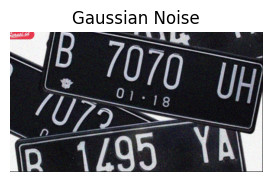

In [87]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 8)
plt.imshow(cv2.cvtColor(noisy_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

plt.show()

In [88]:
# Fungsi untuk melakukan transformasi rotasi
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

In [89]:
# Transformasi geometri: Rotasi
rotated_image = rotate_image(image_cv2, angle=45)

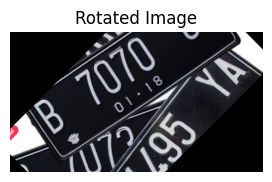

In [90]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 9)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.show()

In [91]:
# Fungsi untuk melakukan flip vertikal
def flip_vertical(image):
    return cv2.flip(image, 0)

In [92]:
# Transformasi geometri: Flip vertikal
flipped_vertical_image = flip_vertical(image_cv2)

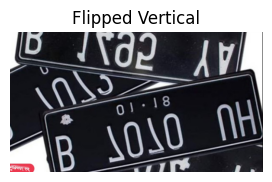

In [93]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 10)
plt.imshow(cv2.cvtColor(flipped_vertical_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Vertical')
plt.axis('off')

plt.show()

In [94]:
# Fungsi untuk melakukan flip horizontal
def flip_horizontal(image):
    return cv2.flip(image, 1)

In [95]:
# Transformasi geometri: Flip horizontal
flipped_horizontal_image = flip_horizontal(image_cv2)

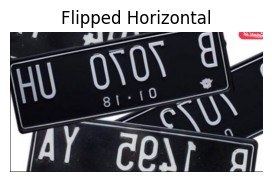

In [96]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 4, 11)
plt.imshow(cv2.cvtColor(flipped_horizontal_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Horizontal')
plt.axis('off')

plt.show()